In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [68]:
# Load the wine dataset
df = pd.read_csv(r"C:\Users\ajmal\Downloads\DSA\Wine_clust.csv")

In [69]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [70]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [71]:
# Preprocess the data by standardizing it
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Kmeans Clustering

In [72]:
# Get the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


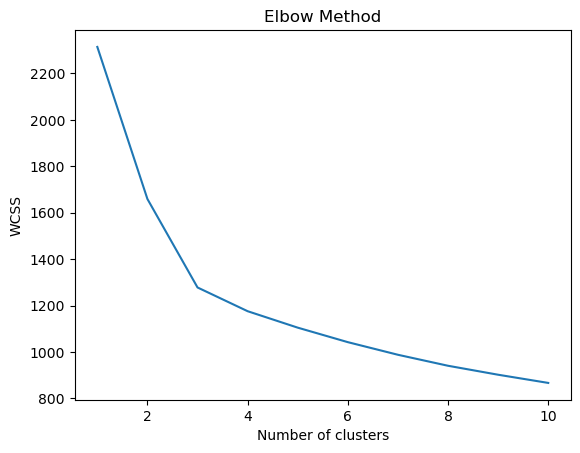

In [73]:
# Plot the WCSS values for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
# Create the K-means model with the optimum number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df_scaled)

In [75]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [76]:
df1=df.iloc[:].values
df1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

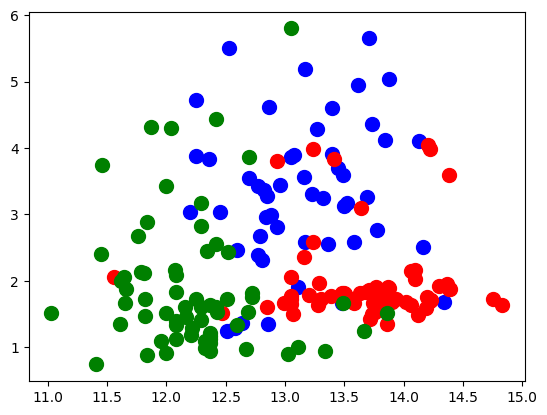

In [77]:
plt.scatter(df1[y_kmeans==0,0],df1[y_kmeans==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(df1[y_kmeans==1,0],df1[y_kmeans==1,1],s=100,c='red',label='cluster 1')
plt.scatter(df1[y_kmeans==2,0],df1[y_kmeans==2,1],s=100,c='green',label='cluster 1')

# PCA

In [78]:
# Apply PCA to the scaled data
pca = PCA(n_components=.95)
df_pca = pca.fit_transform(df_scaled)


In [79]:
y_pca=kmeans.fit_predict(df_scaled)
y_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [80]:
df_pca.shape

(178, 10)

In [81]:
# Fit the K-means model to the PCA transformed data
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

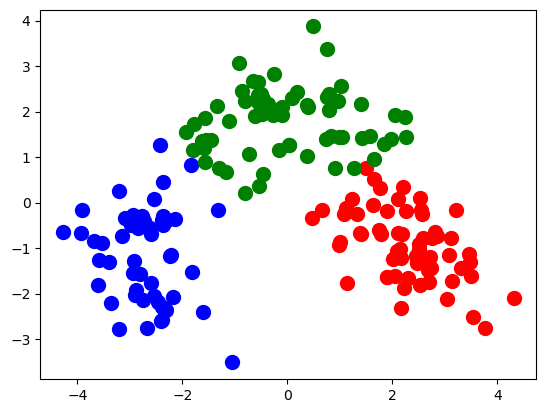

In [44]:
plt.scatter(df_pca[y_kmeans==0,0],df_pca[y_kmeans==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(df_pca[y_kmeans==1,0],df_pca[y_kmeans==1,1],s=100,c='red',label='cluster 1')
plt.scatter(df_pca[y_kmeans==2,0],df_pca[y_kmeans==2,1],s=100,c='green',label='cluster 1')

# Agglomerative

In [90]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering()
y_agg = agg_clustering.fit_predict(df)

In [97]:
y_agg

array([2, 2, 8, 1, 7, 1, 6, 6, 2, 2, 1, 6, 6, 8, 1, 6, 6, 8, 1, 5, 7, 7,
       2, 2, 5, 5, 8, 6, 5, 2, 6, 1, 2, 6, 8, 5, 5, 8, 2, 7, 7, 2, 8, 4,
       5, 2, 2, 2, 2, 6, 8, 6, 8, 6, 2, 8, 2, 6, 6, 3, 4, 3, 4, 0, 0, 4,
       3, 3, 7, 7, 5, 0, 3, 2, 5, 0, 0, 3, 7, 3, 0, 7, 4, 3, 3, 3, 3, 9,
       4, 4, 3, 3, 3, 0, 0, 2, 4, 0, 4, 0, 7, 9, 0, 0, 4, 0, 3, 3, 0, 4,
       9, 0, 9, 0, 0, 0, 3, 0, 0, 9, 4, 3, 0, 0, 0, 0, 0, 3, 0, 9, 4, 3,
       9, 9, 4, 4, 7, 3, 9, 9, 9, 7, 3, 9, 5, 5, 0, 4, 4, 9, 3, 3, 0, 4,
       4, 7, 3, 5, 4, 4, 3, 4, 9, 4, 4, 3, 4, 4, 7, 4, 3, 3, 4, 7, 7, 5,
       5, 9], dtype=int64)

In [91]:
# Calculate silhouette score for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    y_agg = agg_clustering.fit_predict(df)
    silhouette_scores.append(metrics.silhouette_score(df, y_agg))

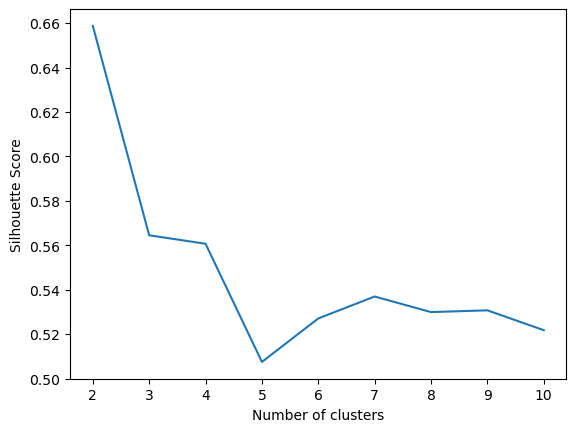

In [62]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [92]:
# Find the optimum number of clusters
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters for Agglomerative Clustering:", optimal_k)

Optimal number of clusters for Agglomerative Clustering: 2


In [93]:
# Train the model with optimum number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(df)

AgglomerativeClustering()

# DBScan

In [109]:
# Perform DBSCAN Clustering
dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(df_scaled)

In [110]:
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [111]:
# Calculate silhouette score for different values of eps
silhouette_scores = []
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    silhouette_scores.append(metrics.silhouette_score(df_scaled, y_agg))

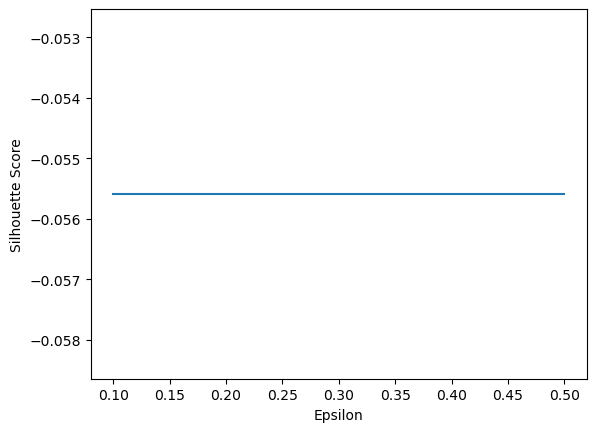

In [112]:
# Plot the silhouette scores
plt.plot(eps_values, silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [113]:
# Find the optimum value of eps
optimal_eps = eps_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal value of eps for DBSCAN:", optimal_eps)

Optimal value of eps for DBSCAN: 0.1


In [114]:
# Train the model with optimum value of eps
dbscan = DBSCAN(eps=optimal_eps)
dbscan.fit(df_scaled)

DBSCAN(eps=0.1)